In [21]:
import pandas as pd

features = pd.read_csv('/kaggle/input/cna-hackathon/training_set_features.csv')
labels = pd.read_csv('/kaggle/input/cna-hackathon/training_set_labels.csv')

In [22]:
features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [23]:
labels.columns

Index(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], dtype='object')

In [24]:
train = pd.merge(features, labels, on='respondent_id')
train.to_csv('train.csv', index=False)
train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


<h1>Manipulating Dataset and handling missing values</h1>

In [25]:
columns_to_drop = ['hhs_geo_region', 'employment_industry', 'employment_occupation']
train = train.drop(columns=columns_to_drop)
train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [26]:
train.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [27]:
print(train['age_group'].unique())

['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']


In [28]:
def convert_age_group(age_group):
    if age_group == '65+ Years':
        return 65
    else:
        age_range = age_group.split(' - ')
        return (int(age_range[0]) + int(age_range[1].split(' ')[0])) // 2

train['age_group'] = train['age_group'].apply(convert_age_group)

print(train['age_group'].unique())

[59 39 26 65 49]


In [29]:
print(train['education'].unique())

['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]


In [30]:
train['education'] = train['education'].fillna('< 12 Years')

# Defining a dictionary
education_mapping = {
    '< 12 Years': 1,
    '12 Years': 2,
    'Some College': 3,
    'College Graduate': 4
}

train['education'] = train['education'].map(education_mapping)

print(train['education'].unique())

[1 2 4 3]


In [31]:
print(train['race'].unique())

['White' 'Black' 'Other or Multiple' 'Hispanic']


In [32]:
train = pd.get_dummies(train, columns=['race'], dtype=int)
print(train.head())

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

In [33]:
train = pd.get_dummies(train, columns=['sex'], dtype=int)

print(train.head())

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

In [34]:
train.drop(columns=['income_poverty'], inplace=True) #dropped as 20% of the data was missing

In [35]:
print(train['marital_status'].unique())

['Not Married' 'Married' nan]


In [36]:
import numpy as np
value_counts = train['marital_status'].value_counts()
nan_indices = train[train['marital_status'].isnull()].index
random_choices = np.random.choice(value_counts.index, size=len(nan_indices), p=value_counts.values / value_counts.sum())
train.loc[nan_indices, 'marital_status'] = random_choices
print(train['marital_status'].isnull().sum())
train = pd.get_dummies(train, columns=['marital_status'], dtype=int)
print(train.head())

0
   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0

In [38]:
import numpy as np
value_counts = train['rent_or_own'].value_counts()
nan_indices = train[train['rent_or_own'].isnull()].index
random_choices = np.random.choice(value_counts.index, size=len(nan_indices), p=value_counts.values / value_counts.sum())
train.loc[nan_indices, 'rent_or_own'] = random_choices
print(train['rent_or_own'].isnull().sum())
train = pd.get_dummies(train, columns=['rent_or_own'], dtype=int)
print(train.head())

0
   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0

In [39]:
print(train['employment_status'].unique())

['Not in Labor Force' 'Employed' 'Unemployed' nan]


In [40]:
mode_value = train['employment_status'].mode()[0]
train['employment_status'].fillna(mode_value, inplace=True)
train = pd.get_dummies(train, columns=['employment_status'], dtype=int)
print(train.head())

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

/tmp/ipykernel_33/568357992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['employment_status'].fillna(mode_value, inplace=True)


In [41]:
print(train['census_msa'].unique())

['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [42]:
train = pd.get_dummies(train, columns=['census_msa'], dtype=int)
print(train.head())

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0  

In [43]:
train.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'household_adults', 'household_children', 'xyz_vaccine',
       'seasonal_vaccine', 'race_Black', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male',
       'marital_status_Married', 'marital_status_Not Married',
       'rent_or_own_Own', 'rent_or_own_Rent', 'employment_status_Employed',
       'employment_status_Not in Labor Force', 'emp

In [44]:
# Drop 'respondent_id' column
train.drop(columns=['respondent_id'], inplace=True)

# Move 'xyz_vaccine' and 'seasonal_vaccine' columns to the end
cols_to_move = ['xyz_vaccine', 'seasonal_vaccine']
train = train[[col for col in train if col not in cols_to_move] + cols_to_move]

print(train.columns)


Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'household_adults', 'household_children', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Female',
       'sex_Male', 'marital_status_Married', 'marital_status_Not Married',
       'rent_or_own_Own', 'rent_or_own_Rent', 'employment_status_Employed',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'census_msa_MSA, Not Principle 

In [45]:
train.isnull().sum()

xyz_concern                                92
xyz_knowledge                             116
behavioral_antiviral_meds                  71
behavioral_avoidance                      208
behavioral_face_mask                       19
behavioral_wash_hands                      42
behavioral_large_gatherings                87
behavioral_outside_home                    82
behavioral_touch_face                     128
doctor_recc_xyz                          2160
doctor_recc_seasonal                     2160
chronic_med_condition                     971
child_under_6_months                      820
health_worker                             804
health_insurance                        12274
opinion_xyz_vacc_effective                391
opinion_xyz_risk                          388
opinion_xyz_sick_from_vacc                395
opinion_seas_vacc_effective               462
opinion_seas_risk                         514
opinion_seas_sick_from_vacc               537
age_group                         

In [46]:
train.drop(columns=['health_insurance'], inplace=True)

In [47]:
columns_to_exclude = ['doctor_recc_xyz', 'doctor_recc_seasonal']

def impute_missing_values(df):
    for col in df.columns:
        if col not in columns_to_exclude:
            if pd.api.types.is_numeric_dtype(df[col]):
                # For numeric columns, fill with random insertion
                random_values = df[col].dropna().sample(df[col].isnull().sum(), replace=True)
                random_values.index = df[df[col].isnull()].index
                df[col].fillna(random_values, inplace=True)
            else:
                # For categorical-like columns, fill with mode (most frequent value)
                df[col].fillna(df[col].mode().iloc[0], inplace=True)
                
impute_missing_values(train)

print(train.isnull().sum())

xyz_concern                                0
xyz_knowledge                              0
behavioral_antiviral_meds                  0
behavioral_avoidance                       0
behavioral_face_mask                       0
behavioral_wash_hands                      0
behavioral_large_gatherings                0
behavioral_outside_home                    0
behavioral_touch_face                      0
doctor_recc_xyz                         2160
doctor_recc_seasonal                    2160
chronic_med_condition                      0
child_under_6_months                       0
health_worker                              0
opinion_xyz_vacc_effective                 0
opinion_xyz_risk                           0
opinion_xyz_sick_from_vacc                 0
opinion_seas_vacc_effective                0
opinion_seas_risk                          0
opinion_seas_sick_from_vacc                0
age_group                                  0
education                                  0
household_

/tmp/ipykernel_33/2600161590.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(random_values, inplace=True)


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Separate features and target for imputation
X_impute = train.drop(columns=['doctor_recc_xyz', 'doctor_recc_seasonal'])
y_impute_xyz = train['doctor_recc_xyz']
y_impute_seasonal = train['doctor_recc_seasonal']

# Impute missing values in the features using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
X_impute = imputer.fit_transform(X_impute)

# Handle NaN in target variables using the most frequent strategy
y_imputer = SimpleImputer(strategy='most_frequent')
y_impute_xyz = y_imputer.fit_transform(y_impute_xyz.values.reshape(-1, 1)).ravel()
y_impute_seasonal = y_imputer.fit_transform(y_impute_seasonal.values.reshape(-1, 1)).ravel()

# Define pipeline for imputation with logistic regression
pipeline_xyz = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', LogisticRegression())
])
pipeline_seasonal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', LogisticRegression())
])

# Fit pipelines to predict 'doctor_recc_xyz' and 'doctor_recc_seasonal'
pipeline_xyz.fit(X_impute, y_impute_xyz)
pipeline_seasonal.fit(X_impute, y_impute_seasonal)

# Predict missing values
train.loc[train['doctor_recc_xyz'].isnull(), 'doctor_recc_xyz'] = pipeline_xyz.predict(
    imputer.transform(train.drop(columns=['doctor_recc_xyz', 'doctor_recc_seasonal'])[train['doctor_recc_xyz'].isnull()])
)
train.loc[train['doctor_recc_seasonal'].isnull(), 'doctor_recc_seasonal'] = pipeline_seasonal.predict(
    imputer.transform(train.drop(columns=['doctor_recc_xyz', 'doctor_recc_seasonal'])[train['doctor_recc_seasonal'].isnull()])
)

# Print the number of NaN values in each column after imputation
print(train.isnull().sum())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


xyz_concern                             0
xyz_knowledge                           0
behavioral_antiviral_meds               0
behavioral_avoidance                    0
behavioral_face_mask                    0
behavioral_wash_hands                   0
behavioral_large_gatherings             0
behavioral_outside_home                 0
behavioral_touch_face                   0
doctor_recc_xyz                         0
doctor_recc_seasonal                    0
chronic_med_condition                   0
child_under_6_months                    0
health_worker                           0
opinion_xyz_vacc_effective              0
opinion_xyz_risk                        0
opinion_xyz_sick_from_vacc              0
opinion_seas_vacc_effective             0
opinion_seas_risk                       0
opinion_seas_sick_from_vacc             0
age_group                               0
education                               0
household_adults                        0
household_children                

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-" * 40)

Column: xyz_concern
Unique values: [1. 3. 2. 0.]
----------------------------------------
Column: xyz_knowledge
Unique values: [0. 2. 1.]
----------------------------------------
Column: behavioral_antiviral_meds
Unique values: [0. 1.]
----------------------------------------
Column: behavioral_avoidance
Unique values: [0. 1.]
----------------------------------------
Column: behavioral_face_mask
Unique values: [0. 1.]
----------------------------------------
Column: behavioral_wash_hands
Unique values: [0. 1.]
----------------------------------------
Column: behavioral_large_gatherings
Unique values: [0. 1.]
----------------------------------------
Column: behavioral_outside_home
Unique values: [1. 0.]
----------------------------------------
Column: behavioral_touch_face
Unique values: [1. 0.]
----------------------------------------
Column: doctor_recc_xyz
Unique values: [0. 1.]
----------------------------------------
Column: doctor_recc_seasonal
Unique values: [0. 1.]
-------------

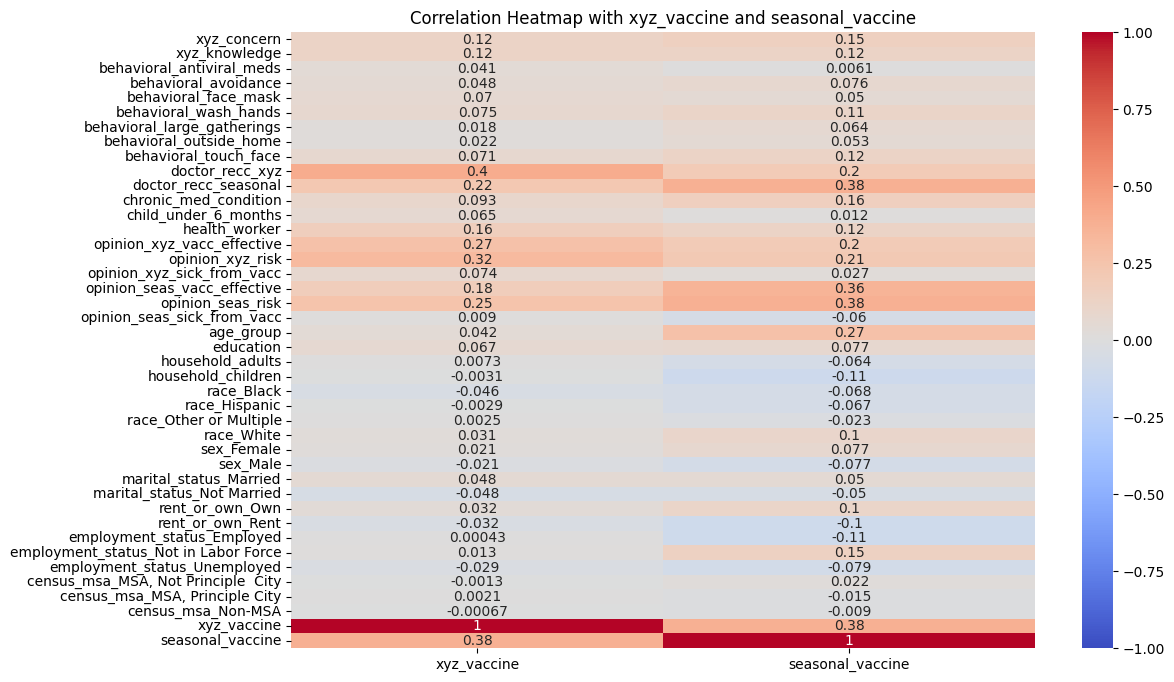

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train.corr()

correlation_targets = correlation_matrix[['xyz_vaccine', 'seasonal_vaccine']]
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_targets, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap with xyz_vaccine and seasonal_vaccine')

plt.show()

<h1>Training Models</h1>

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target variables
X = train.drop(columns=['xyz_vaccine', 'seasonal_vaccine'])
y_xyz = train['xyz_vaccine']
y_seasonal = train['seasonal_vaccine']

# Split
X_train, X_test, y_xyz_train, y_xyz_test, y_seasonal_train, y_seasonal_test = train_test_split(
    X, y_xyz, y_seasonal, test_size=0.2, random_state=42)

# Defining pipelines
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', RandomForestClassifier())
])

# Defining parameters
param_grid_lr = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30]
}

# GridSearchCV for hyperparameters
grid_search_lr_xyz = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr_seasonal = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search_rf_xyz = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf_seasonal = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit
grid_search_lr_xyz.fit(X_train, y_xyz_train)
grid_search_lr_seasonal.fit(X_train, y_seasonal_train)

grid_search_rf_xyz.fit(X_train, y_xyz_train)
grid_search_rf_seasonal.fit(X_train, y_seasonal_train)

# Evaluate
best_lr_xyz = grid_search_lr_xyz.best_estimator_
best_lr_seasonal = grid_search_lr_seasonal.best_estimator_

best_rf_xyz = grid_search_rf_xyz.best_estimator_
best_rf_seasonal = grid_search_rf_seasonal.best_estimator_

y_xyz_pred_lr = best_lr_xyz.predict_proba(X_test)[:, 1]
y_seasonal_pred_lr = best_lr_seasonal.predict_proba(X_test)[:, 1]

y_xyz_pred_rf = best_rf_xyz.predict_proba(X_test)[:, 1]
y_seasonal_pred_rf = best_rf_seasonal.predict_proba(X_test)[:, 1]

roc_auc_lr_xyz = roc_auc_score(y_xyz_test, y_xyz_pred_lr)
roc_auc_lr_seasonal = roc_auc_score(y_seasonal_test, y_seasonal_pred_lr)

roc_auc_rf_xyz = roc_auc_score(y_xyz_test, y_xyz_pred_rf)
roc_auc_rf_seasonal = roc_auc_score(y_seasonal_test, y_seasonal_pred_rf)

print(f'Logistic Regression XYZ Vaccine ROC AUC: {roc_auc_lr_xyz}')
print(f'Logistic Regression Seasonal Vaccine ROC AUC: {roc_auc_lr_seasonal}')
print(f'Random Forest XYZ Vaccine ROC AUC: {roc_auc_rf_xyz}')
print(f'Random Forest Seasonal Vaccine ROC AUC: {roc_auc_rf_seasonal}')

# Choose the best performing model based on ROC AUC
best_model_xyz, best_model_seasonal = None, None
if (roc_auc_lr_xyz + roc_auc_lr_seasonal) > (roc_auc_rf_xyz + roc_auc_rf_seasonal):
    best_model_xyz = best_lr_xyz
    best_model_seasonal = best_lr_seasonal
    best_model_type = 'Logistic Regression'
    best_model_params_xyz = grid_search_lr_xyz.best_params_
    best_model_params_seasonal = grid_search_lr_seasonal.best_params_
    roc_auc_best_xyz = roc_auc_lr_xyz
    roc_auc_best_seasonal = roc_auc_lr_seasonal
else:
    best_model_xyz = best_rf_xyz
    best_model_seasonal = best_rf_seasonal
    best_model_type = 'Random Forest'
    best_model_params_xyz = grid_search_rf_xyz.best_params_
    best_model_params_seasonal = grid_search_rf_seasonal.best_params_
    roc_auc_best_xyz = roc_auc_rf_xyz
    roc_auc_best_seasonal = roc_auc_rf_seasonal

# Print the best model and its parameters
print(f'Best Model Type: {best_model_type}')
print(f'Best Model Parameters for XYZ Vaccine: {best_model_params_xyz}')
print(f'Best Model Parameters for Seasonal Vaccine: {best_model_params_seasonal}')
print(f'Best Model XYZ Vaccine ROC AUC: {roc_auc_best_xyz}')
print(f'Best Model Seasonal Vaccine ROC AUC: {roc_auc_best_seasonal}')

Logistic Regression XYZ Vaccine ROC AUC: 0.8299265058114615
Logistic Regression Seasonal Vaccine ROC AUC: 0.8509285630315442
Random Forest XYZ Vaccine ROC AUC: 0.8372082713528142
Random Forest Seasonal Vaccine ROC AUC: 0.8556817038372722
Best Model Type: Random Forest
Best Model Parameters for XYZ Vaccine: {'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best Model Parameters for Seasonal Vaccine: {'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best Model XYZ Vaccine ROC AUC: 0.8372082713528142
Best Model Seasonal Vaccine ROC AUC: 0.8556817038372722


In [52]:
test = pd.read_csv('/kaggle/input/cna-hackathon/test_set_features.csv')
test.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [53]:
columns_to_drop = ['hhs_geo_region', 'employment_industry', 'employment_occupation']
test = test.drop(columns=columns_to_drop)

In [54]:
def convert_age_group(age_group):
    if age_group == '65+ Years':
        return 65
    else:
        age_range = age_group.split(' - ')
        return (int(age_range[0]) + int(age_range[1].split(' ')[0])) // 2
test['age_group'] = test['age_group'].apply(convert_age_group)
test['education'] = test['education'].fillna('< 12 Years')
education_mapping = {
    '< 12 Years': 1,
    '12 Years': 2,
    'Some College': 3,
    'College Graduate': 4
}
test['education'] = test['education'].map(education_mapping)



test = pd.get_dummies(test, columns=['race'], dtype=int)


test = pd.get_dummies(test, columns=['sex'], dtype=int)


test.drop(columns=['income_poverty'], inplace=True)


import numpy as np
value_counts = test['marital_status'].value_counts()
nan_indices = test[test['marital_status'].isnull()].index
random_choices = np.random.choice(value_counts.index, size=len(nan_indices), p=value_counts.values / value_counts.sum())
test.loc[nan_indices, 'marital_status'] = random_choices
print(test['marital_status'].isnull().sum())
test = pd.get_dummies(test, columns=['marital_status'], dtype=int)


import numpy as np
value_counts = test['rent_or_own'].value_counts()
nan_indices = test[test['rent_or_own'].isnull()].index
random_choices = np.random.choice(value_counts.index, size=len(nan_indices), p=value_counts.values / value_counts.sum())
test.loc[nan_indices, 'rent_or_own'] = random_choices
test = pd.get_dummies(test, columns=['rent_or_own'], dtype=int)


mode_value = test['employment_status'].mode()[0]
test['employment_status'].fillna(mode_value, inplace=True)
test = pd.get_dummies(test, columns=['employment_status'], dtype=int)


test = pd.get_dummies(test, columns=['census_msa'], dtype=int)


test.drop(columns=['health_insurance'], inplace=True)


columns_to_exclude = ['doctor_recc_xyz', 'doctor_recc_seasonal']
def impute_missing_values(df):
    for col in df.columns:
        if col not in columns_to_exclude:
            if pd.api.types.is_numeric_dtype(df[col]):
                # For numeric columns, fill with random insertion
                random_values = df[col].dropna().sample(df[col].isnull().sum(), replace=True)
                random_values.index = df[df[col].isnull()].index
                df[col].fillna(random_values, inplace=True)
            else:
                # For categorical-like columns, fill with mode (most frequent value)
                df[col].fillna(df[col].mode().iloc[0], inplace=True)
impute_missing_values(test)



X_impute = test.drop(columns=['doctor_recc_xyz', 'doctor_recc_seasonal'])
y_impute_xyz = test['doctor_recc_xyz']
y_impute_seasonal = test['doctor_recc_seasonal']
imputer = SimpleImputer(strategy='most_frequent')
X_impute = imputer.fit_transform(X_impute)
y_imputer = SimpleImputer(strategy='most_frequent')
y_impute_xyz = y_imputer.fit_transform(y_impute_xyz.values.reshape(-1, 1)).ravel()
y_impute_seasonal = y_imputer.fit_transform(y_impute_seasonal.values.reshape(-1, 1)).ravel()
pipeline_xyz = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', LogisticRegression())
])
pipeline_seasonal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', LogisticRegression())
])
pipeline_xyz.fit(X_impute, y_impute_xyz)
pipeline_seasonal.fit(X_impute, y_impute_seasonal)
test.loc[test['doctor_recc_xyz'].isnull(), 'doctor_recc_xyz'] = pipeline_xyz.predict(
    imputer.transform(test.drop(columns=['doctor_recc_xyz', 'doctor_recc_seasonal'])[test['doctor_recc_xyz'].isnull()])
)
test.loc[test['doctor_recc_seasonal'].isnull(), 'doctor_recc_seasonal'] = pipeline_seasonal.predict(
    imputer.transform(test.drop(columns=['doctor_recc_xyz', 'doctor_recc_seasonal'])[test['doctor_recc_seasonal'].isnull()])
)



print(test.isnull().sum())

0


/tmp/ipykernel_33/3371479539.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['employment_status'].fillna(mode_value, inplace=True)
/tmp/ipykernel_33/3371479539.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

respondent_id                           0
xyz_concern                             0
xyz_knowledge                           0
behavioral_antiviral_meds               0
behavioral_avoidance                    0
behavioral_face_mask                    0
behavioral_wash_hands                   0
behavioral_large_gatherings             0
behavioral_outside_home                 0
behavioral_touch_face                   0
doctor_recc_xyz                         0
doctor_recc_seasonal                    0
chronic_med_condition                   0
child_under_6_months                    0
health_worker                           0
opinion_xyz_vacc_effective              0
opinion_xyz_risk                        0
opinion_xyz_sick_from_vacc              0
opinion_seas_vacc_effective             0
opinion_seas_risk                       0
opinion_seas_sick_from_vacc             0
age_group                               0
education                               0
household_adults                  

In [59]:
test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,0,1,1,0,0,1,0,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,1
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,1,0,1,0,0,0,0,1
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,1,0,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1,1,0,1,0,0,0,0,1


In [63]:
test = test.drop(columns=['respondent_id'])
test.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,1,1,0,0,1,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,1
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,1
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,1,0,1,0,0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,1,1,0,1,0,0,0,0,1


In [64]:
submission = pd.read_csv('/kaggle/input/cna-hackathon/test_set_features.csv')
res_id = submission['respondent_id']
print(res_id)

0        26707
1        26708
2        26709
3        26710
4        26711
         ...  
26703    53410
26704    53411
26705    53412
26706    53413
26707    53414
Name: respondent_id, Length: 26708, dtype: int64


In [65]:
y_test_prob_xyz_rf = best_rf_xyz.predict_proba(test)[:, 1]
y_test_prob_seasonal_rf = best_rf_seasonal.predict_proba(test)[:, 1]
print(y_test_prob_xyz_rf)
print(y_test_prob_seasonal_rf)

[0.13750929 0.0477032  0.4599903  ... 0.09363736 0.07962171 0.43506716]
[0.24547542 0.07826683 0.76339221 ... 0.23993861 0.40310242 0.60534749]


In [67]:
submission_rf = pd.DataFrame({
    'respondent_id': res_id,
    'xyz_vaccine': y_test_prob_xyz_rf,
    'seasonal_vaccine': y_test_prob_seasonal_rf
})

print(submission_rf.head())

   respondent_id  xyz_vaccine  seasonal_vaccine
0          26707     0.137509          0.245475
1          26708     0.047703          0.078267
2          26709     0.459990          0.763392
3          26710     0.511300          0.842661
4          26711     0.215961          0.413407


In [68]:
submission_rf.to_csv("submission_rf.csv", index=False)

<h1>Other attempts with low ROC AUC Score</h1>

XGB

In [116]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_xyz = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_seasonal = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_xyz.fit(X_train, y_xyz_train)

y_pred_proba_xyz = xgb_xyz.predict_proba(X_test)[:, 1]

roc_auc_xyz = roc_auc_score(y_xyz_test, y_pred_proba_xyz)
print(f"ROC AUC on test set for XYZ Vaccine: {roc_auc_xyz}")

xgb_seasonal.fit(X_train, y_seasonal_train)

y_pred_proba_seasonal = xgb_seasonal.predict_proba(X_test)[:, 1]

roc_auc_seasonal = roc_auc_score(y_seasonal_test, y_pred_proba_seasonal)
print(f"ROC AUC on test set for Seasonal Vaccine: {roc_auc_seasonal}")

ROC AUC on test set for XYZ Vaccine: 0.8197232517291515
ROC AUC on test set for Seasonal Vaccine: 0.847632976805435


Gaussain Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB

nb_xyz = GaussianNB()
nb_seasonal = GaussianNB()

nb_xyz.fit(X_train, y_xyz_train)

y_pred_proba_xyz = nb_xyz.predict_proba(X_test)[:, 1]

roc_auc_xyz = roc_auc_score(y_xyz_test, y_pred_proba_xyz)
print(f"ROC AUC on test set for XYZ Vaccine: {roc_auc_xyz}")

nb_seasonal.fit(X_train, y_seasonal_train)

y_pred_proba_seasonal = nb_seasonal.predict_proba(X_test)[:, 1]

roc_auc_seasonal = roc_auc_score(y_seasonal_test, y_pred_proba_seasonal)
print(f"ROC AUC on test set for Seasonal Vaccine: {roc_auc_seasonal}")


ROC AUC on test set for XYZ Vaccine: 0.7846941734109876
ROC AUC on test set for Seasonal Vaccine: 0.7971103924008457


KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn_xyz = KNeighborsClassifier(n_neighbors=5)
knn_seasonal = KNeighborsClassifier(n_neighbors=5)

knn_xyz.fit(X_train, y_xyz_train)

y_pred_proba_xyz = knn_xyz.predict_proba(X_test)[:, 1]

roc_auc_xyz = roc_auc_score(y_xyz_test, y_pred_proba_xyz)
print(f"ROC AUC on test set for XYZ Vaccine: {roc_auc_xyz}")

knn_seasonal.fit(X_train, y_seasonal_train)

y_pred_proba_seasonal = knn_seasonal.predict_proba(X_test)[:, 1]

roc_auc_seasonal = roc_auc_score(y_seasonal_test, y_pred_proba_seasonal)
print(f"ROC AUC on test set for Seasonal Vaccine: {roc_auc_seasonal}")

ROC AUC on test set for XYZ Vaccine: 0.7352999016715831
ROC AUC on test set for Seasonal Vaccine: 0.785203690006592


SVM

In [120]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True) 

svm_model.fit(X_train, y_xyz_train)

y_pred_proba_xyz = svm_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_xyz_test, y_pred_proba_xyz)
print(f"ROC AUC on test set: {roc_auc}")

ROC AUC on test set: 0.8241133634201481


In [121]:
svm_model = SVC(kernel='rbf', probability=True)  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

svm_model.fit(X_train, y_seasonal_train)

y_pred_proba_seasonal = svm_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_seasonal_test, y_pred_proba_seasonal)
print(f"ROC AUC on test set: {roc_auc}")

ROC AUC on test set: 0.8479153709489107
